## Support Vector Machine

### Import Libs

In [1]:
import csv
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

from oct2py import octave
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.svm import SVC, LinearSVC

%matplotlib inline

### SVM with linear kernel

In [2]:
# Load dataset 1
data = sio.loadmat('data/SVM1.mat')

In [3]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

In [4]:
def plot_data(X, y):
    '''Plots examples X and their class y in a 2D scatter plot.
    
    X must be an array of shape (m,2)
    y must be an array of shape (m,)
    '''
    
    plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
    plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
    
def plot_boundary(X, clf, level=0.0):
    '''Plots a decision boundary using trained classifier clf.
    
    The decision boundary is drawn at given level (default=0.0)
    in the range of X. X must be an array of shape (m,2).
    '''
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    h = 0.01 # grid step size
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)

    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)
    
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])
    
def plot_support_vectors(clf):
    '''Plot the support vectors from trained support vector classifier clf.
    
    Only the support vectors of the first two classes are drawn.
    '''
    
    # Obtain support vectors for first two classes
    sv_neg, sv_pos = np.vsplit(clf.support_vectors_, np.cumsum(clf.n_support_)[0:1])

    # Plot support vectors
    plt.plot(sv_neg[:,0], sv_neg[:,1], 'r+', label='neg SVs', alpha=0.5)
    plt.plot(sv_pos[:,0], sv_pos[:,1], 'rx', label='pos SVs', alpha=0.5)
    plt.legend()

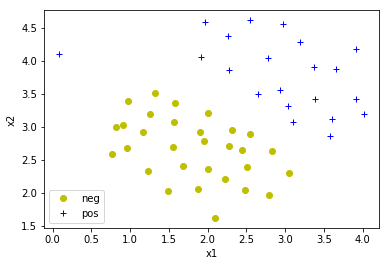

In [5]:
# Plot dataset 1
plot_data(X, y)

In [6]:
# Train a support vector classifier with C=1 using a linear kernel.
# SVC uses libsvm. For scaling to a large number of examples consider
# using LinearSVC which uses liblinear instead (see docs for details).
clf = SVC(C=1, kernel='linear') 
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C=1 misclassifies the outlier as shown in the following figure:

Text(0.5,1,'C=1')

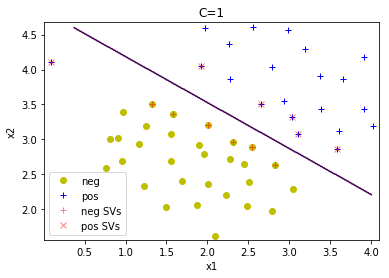

In [7]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=1')

In [8]:
# Train a support vector classifier with C=100 using a linear kernel.
clf = SVC(C=100, kernel='linear')
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C=100 correctly classifies the outlier as shown in the following figure (less regularization = higher variance, lower bias):

Text(0.5,1,'C=100')

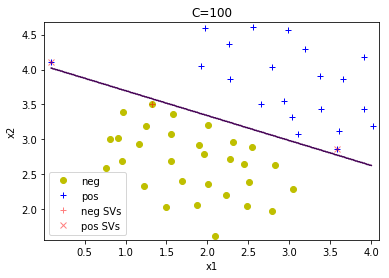

In [9]:
plot_data(X, y)
plot_boundary(X, clf)
plot_support_vectors(clf)
plt.title('C=100')

### SVM with Gaussian kernel

An [RBF kernel](http://scikit-learn.org/stable/modules/metrics.html#rbf-kernel) with gamma=1/sigma<sup>2</sup> is know as Gaussian kernel of variance sigma<sup>2</sup>.

In [10]:
# Load dataset 2
data = sio.loadmat('data/SVM2.mat')

In [11]:
# Examples with features x1 and x2
X = data['X']
# Examples target class (0=neg, 1=pos)
y = data['y'].ravel()

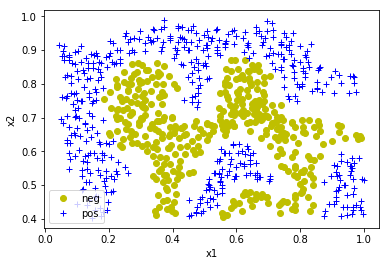

In [12]:
# Plot dataset 2
plot_data(X, y)

In [13]:
# Train a support vector classifier with C=1 using an RBF kernel.
# In ex6.m (original Octave exercise code), sigma=0.1, hence we
# set gamma to 100 (=1/sigma**2)
clf = SVC(C=1, kernel='rbf', gamma=100)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'C=1, gamma=100')

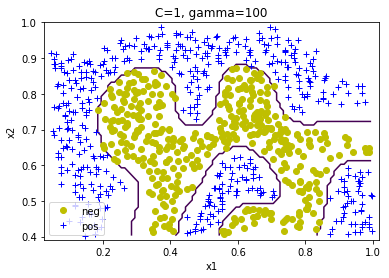

In [14]:
plot_data(X, y)
plot_boundary(X, clf)
plt.title('C=1, gamma=100')